In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [11]:
data = pd.read_csv('data.csv')

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [100]:
data = data.dropna()
data.loc[data['num'] == 1, 'num'] = 0
data.loc[data['num'] >= 2, 'num'] = 1

In [101]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [102]:
pd.DataFrame(y)

,num
0,0
1,1
2,0
3,0
4,0
...,...
297,0
298,0
299,1
300,1


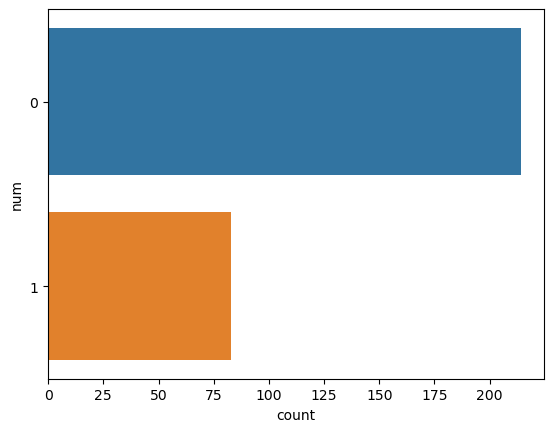

In [103]:
sns.countplot(pd.DataFrame(y), y="num")
plt.show()

In [34]:
print('----------Checking for Data Imbalance------------')
print('Number of Positive Outcomes: ', positive_outcomes)
print('Percentage of Positive Outcomes: {}%'.format(round((positive_outcomes / total_samples) * 100, 2)))
print('Number of Negative Outcomes : ', negative_outcomes)
print('Percentage of Negative Outcomes: {}%'.format(round((negative_outcomes / total_samples) * 100, 2)))
print('\n')


----------Checking for Data Imbalance------------


NameError: name 'positive_outcomes' is not defined

In [35]:
positive_outcomes, negative_outcomes = y.value_counts()
total_samples = y.count()

ValueError: too many values to unpack (expected 2)

In [104]:
def impute_missing_values(dataframe):
    columns_to_impute = ['age', 'sex', 'cp', 'chol', 'fbs']
    
    for column in columns_to_impute:
        
        dataframe[column].fillna(dataframe[column].mean(), inplace=True)


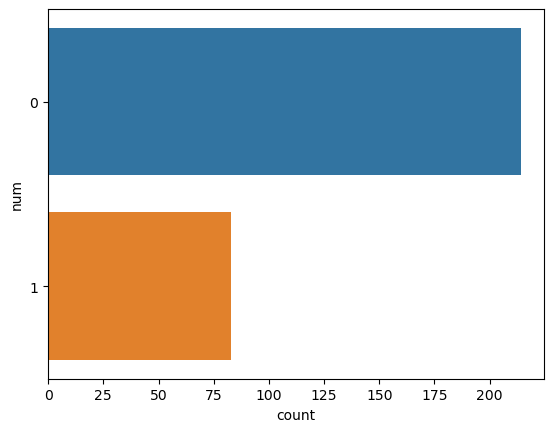

In [105]:
sns.countplot(pd.DataFrame(y), y="num")
plt.show()

In [106]:
value_counts = y.value_counts()
positive_outcomes = value_counts[1]  # Assuming positive outcomes are represented by 1
negative_outcomes = value_counts[0]  # Assuming negative outcomes are represented by 0
total_samples = y.count()


In [107]:
print('----------Checking for Data Imbalance------------')
print('Number of Positive Outcomes: ', positive_outcomes)
print('Percentage of Positive Outcomes: {}%'.format(round((positive_outcomes / total_samples) * 100, 2)))
print('Number of Negative Outcomes : ', negative_outcomes)
print('Percentage of Negative Outcomes: {}%'.format(round((negative_outcomes / total_samples) * 100, 2)))
print('\n')

----------Checking for Data Imbalance------------
Number of Positive Outcomes:  83
Percentage of Positive Outcomes: 27.95%
Number of Negative Outcomes :  214
Percentage of Negative Outcomes: 72.05%




In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
rf = RandomForestClassifier()
test_results = []

In [144]:
for train_index, test_index in kf.split(X):
  #  print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    TN, FP, FN, TP = confusion_matrix(y_pred,np.array(y_test)).ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP)
    F1_measure = 2 * TP / (2 * TP + FP + FN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    
    metrics = [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS]

    test_results.append([TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS])

In [149]:
test_result = pd.DataFrame(test_results, columns=['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS'])
test_result

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Precision,F1_measure,Accuracy,Error_rate,BACC,TSS,HSS
0,6,21,1,2,0.750000,0.954545,0.045455,0.250000,0.857143,0.800000,0.900000,0.100000,0.852273,0.704545,0.733728
1,5,20,2,3,0.625000,0.909091,0.090909,0.375000,0.714286,0.666667,0.833333,0.166667,0.767045,0.534091,0.556213
2,4,19,3,4,0.500000,0.863636,0.136364,0.500000,0.571429,0.533333,0.766667,0.233333,0.681818,0.363636,0.378698
3,8,16,4,2,0.800000,0.800000,0.200000,0.200000,0.666667,0.727273,0.800000,0.200000,0.800000,0.600000,0.571429
4,6,21,1,2,0.750000,0.954545,0.045455,0.250000,0.857143,0.800000,0.900000,0.100000,0.852273,0.704545,0.733728
5,6,18,2,4,0.600000,0.900000,0.100000,0.400000,0.750000,0.666667,0.800000,0.200000,0.750000,0.500000,0.526316
6,4,20,5,1,0.800000,0.800000,0.200000,0.200000,0.444444,0.571429,0.800000,0.200000,0.800000,0.600000,0.454545
7,3,21,4,1,0.750000,0.840000,0.160000,0.250000,0.428571,0.545455,0.827586,0.172414,0.795000,0.590000,0.448669
8,3,17,5,4,0.428571,0.772727,0.227273,0.571429,0.375000,0.400000,0.689655,0.310345,0.600649,0.201299,0.191950
9,9,18,2,0,1.000000,0.900000,0.100000,0.000000,0.818182,0.900000,0.931034,0.068966,0.950000,0.900000,0.848168


In [155]:

# Computing average row
avg_row = test_result.mean(axis=1)


avg_row

0    2.463179
1    2.415887
2    2.368594
3    2.424358
4    2.463179
5    2.412865
6    2.391361
7    2.320513
8    2.251260
9    2.427757
dtype: float64

In [161]:
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 28.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 40.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 39.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.4 MB/s eta 0:00:00a 0:00:

In [162]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [163]:
model = Sequential()
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.add(LSTM(100, input_shape=(X.shape[1], 1)))

In [ ]:
for train_index, test_index in kf.split(X):
  #  print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    TN, FP, FN, TP = confusion_matrix(y_pred,np.array(y_test)).ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP)
    F1_measure = 2 * TP / (2 * TP + FP + FN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    
    metrics = [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS]

    test_results.append([TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS])